## Importar dataset

In [1]:
import pandas as pd
data = pd.read_csv('abcnews-date-text.csv')

In [2]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


<Axes: >

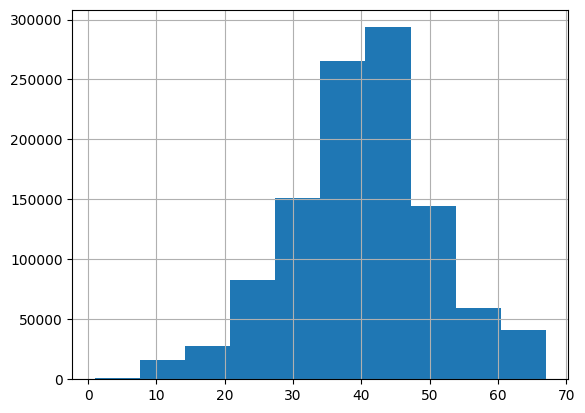

In [3]:
# Vemos como los titulares tienen entre 35 y 50 palabras
data['headline_text'].str.len().hist()

<Axes: >

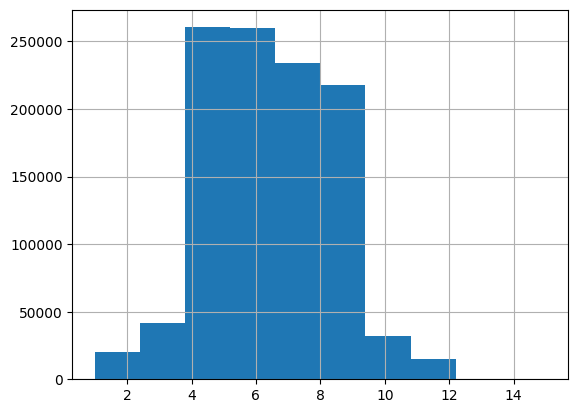

In [4]:
data['headline_text'].str.split().map(lambda x: len(x)).hist()

#### Hacemos uso de las stop words, que son como preposiciones

In [5]:
import nltk
from nltk.corpus import stopwords

In [6]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
corpus = []
new = data['headline_text'].str.split()
new = new.values.tolist()

In [8]:
corpus = [word for _list in new for word in _list]

In [9]:
from collections import defaultdict
stop_words_counter = defaultdict(int)
for word in corpus:
  if word in stop:
    stop_words_counter[word] +=1

In [10]:
sorted_stop_words_counter = {key: value for key, value in sorted(stop_words_counter.items(), key= lambda item: item[1]) }
x, y = [], []
for key, value in stop_words_counter.items():
  x.append(key)
  y.append(value)

<Axes: >

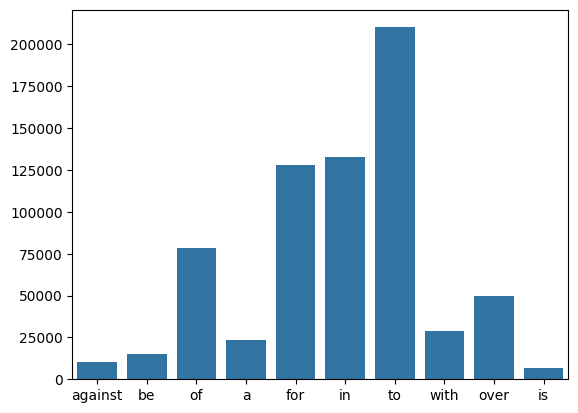

In [11]:
import seaborn as sns

sns.barplot(x=x[:10],y=y[:10])

Las palabras que más se repiten

In [12]:
words_counter = defaultdict(int)
for word in corpus:
  if word not in stop:
    words_counter[word] += 1

sorted_words_counter = {key: value for key, value in sorted(words_counter.items(), key=lambda item: item[1], reverse=True)}

x, y = [], []
for key, value in sorted_words_counter.items():
  x.append(key)
  y.append(value)


<Axes: >

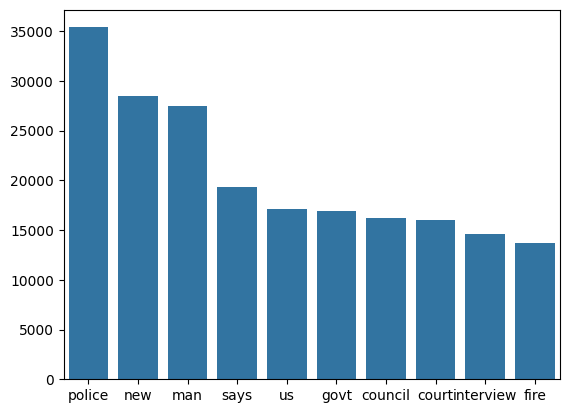

In [13]:
sns.barplot(x=x[:10],y=y[:10])

Las palabras que menos se repiten

In [14]:
sorted_words_counter = {key: value for key, value in sorted(stop_words_counter.items(), key= lambda item: item[1], reverse=True) }
x, y = [], []
for key, value in sorted_stop_words_counter.items():
  x.append(key)
  y.append(value)

<Axes: >

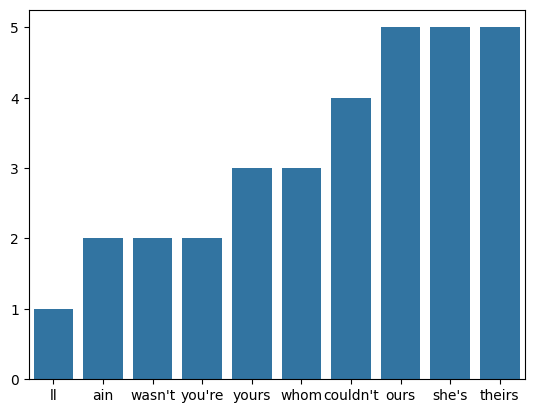

In [15]:
sns.barplot(x=x[:10],y=y[:10])

Las palabras que no se repiten

In [16]:
sorted_words_counter = {key: value for key, value in sorted(words_counter.items(), key= lambda item: item[1], reverse=True) }
x, y = [], []
for key, value in sorted_words_counter.items():
  x.append(key)
  y.append(value)

<Axes: >

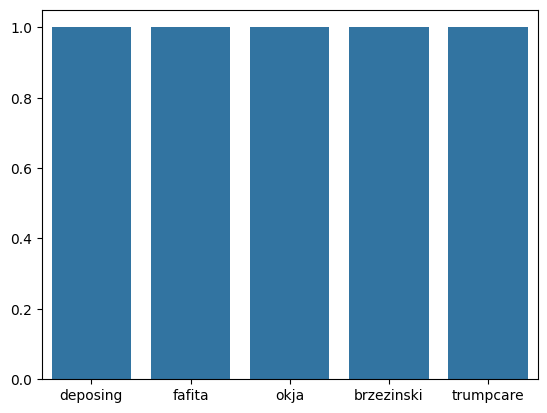

In [17]:
sns.barplot(x=x[-5:],y=y[-5:])

In [18]:
new[0]

['aba', 'decides', 'against', 'community', 'broadcasting', 'licence']

La combinación de palabras que más se repite

In [19]:
bigrams = []
for sentence in new:
  for i in range(len(sentence) -2):
    bigram = (sentence[i], sentence[i+1], sentence[i+2])
    bigrams.append(bigram)

In [20]:
counter_bigrams = defaultdict(int)
for bigram in bigrams:
  counter_bigrams[bigram] +=1

In [21]:
sorted_bigrams_counter = {key: value for key, value in sorted(counter_bigrams.items(), key= lambda item: item[1], reverse=True) }
x, y = [], []
for key, value in sorted_bigrams_counter.items():
  x.append(key)
  y.append(value)

In [22]:
x = [f"{x[0]} {x[1]} {x[2]}" for x in x]

<Axes: >

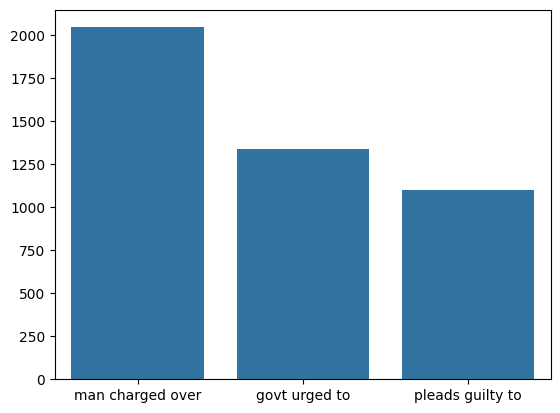

In [24]:
sns.barplot(x=x[:3],y=y[:3])